In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [36]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:

df=pd.read_csv('/content/Studente_Happiness_Prediction.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 23 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Age                                                                                                985 non-null    object 
 1   Gender                                                                                             985 non-null    object 
 2   Occupation                                                                                         985 non-null    object 
 3   Relationship Status                                                                                985 non-null    object 
 4   Education Level                                                                                    985 non-null    object 

In [39]:

df.head()

,Age,Gender,Occupation,Relationship Status,Education Level,Physical Health?,Satisfied with Physical Fitness?,Close to others,Mental Health,Illnesses or Disabilities,...,Where do you think you could make changes to increase your happiness levels?,Social Support Network,How often do you feel happy in a typical week?,How satisfied are you with your current job or occupation?,Achievement of Personal Goals,Self-esteem and Self-confidence,Tpical social style?,During which year do you feel you experienced the highest level of Happiness?,During which year do you feel you experienced the most difficult times or lowest Emotional State?,How happy do you usually consider yourself?
0,18-24,Male,Student,Broken,Bachelor's degree,Good,Very Satisfied,Occasionally,Good,No,...,Spend more time with loved ones,Neutral,Occasionally,Not Satisfied at all,"No, I have not achieved my personal goals yet",High,Extroverted,2019.0,2023,Moderately happy
1,25-36,Prefer not to say,Student,Complicated,Less than high school,Poor,Very Satisfied,Most of the time,Excellent,Yes,...,Get enough sleep,Strongly disagree,Occasionally,Slightly Satisfied,"Yes, I have achieved most of my personal goals",High,Ambivert (both extroverted and introverted ten...,2023.0,2021,Very Happy
2,18-24,Female,Student,Broken,Bachelor's degree,Fair,Slightly Satisfied,Most of the time,Fair,Maybe,...,No Overthinking,Neutral,Occasionally,Slightly Satisfied,"No, I have not achieved my personal goals yet",Moderate,Ambivert (both extroverted and introverted ten...,2016.0,2023,Moderately happy
3,18-24,Male,Student,In a realtionship,High school diploma/GED,Good,Moderately Satisfied,Most of the time,Excellent,No,...,Stay positive and optimistic,Strongly agree,Rarely or Never,Slightly Satisfied,"No, I have not achieved my personal goals yet",High,Ambivert (both extroverted and introverted ten...,2020.0,2021,Very Happy
4,18-24,Male,Student,Single,Bachelor's degree,Fair,Slightly Satisfied,Most of the time,Fair,Maybe,...,Stay positive and optimistic,Neutral,Occasionally,Moderately Satisfied,"No, I have not achieved my personal goals yet",High,Ambivert (both extroverted and introverted ten...,2021.0,2018,Moderately happy


In [40]:

df.shape

(985, 23)

# Rename

In [41]:
rename_dict = {
    "Age": "age",
    "Gender": "gender",
    "Occupation": "occupation",
    "Relationship Status": "relationship_status",
    "Education Level": "education_level",
    "Physical Health?": "physical_health",
    "Satisfied with Physical Fitness?": "satisfied_with_physical_fitness",
    "Close to others": "close_to_others",
    "Mental Health": "mental_health",
    "Illnesses or Disabilities": "illnesses_or_disabilities",
    "Relationships with Family Members": "relationships_with_family",
    "Relationships with Friends": "relationships_with_friends",
    "What part of your life do you think could bring you more joy and satisfaction?": "joy_and_satisfaction_aspect",
    "Where do you think you could make changes to increase your happiness levels?": "happiness_improvement_areas",
    "Social Support Network": "social_support_network",
    "How often do you feel happy in a typical week?": "weekly_happiness_frequency",
    "How satisfied are you with your current job or occupation?": "job_satisfaction",
    "Achievement of Personal Goals": "personal_goals_achievement",
    "Self-esteem and Self-confidence": "self_esteem_confidence",
    "Tpical social style?": "typical_social_style",
    "During which year do you feel you experienced the highest level of Happiness?": "happiest_year",
    "During which year do you feel you experienced the most difficult times or lowest Emotional State?": "toughest_year",
    "How happy do you usually consider yourself?": "self_perceived_happiness"
}
# Renaming columns
df.rename(columns=rename_dict, inplace=True) #The changes are applied directly to df



# check isnull

In [42]:

df.isnull().sum()

,0
age,0
gender,0
occupation,0
relationship_status,0
education_level,0
physical_health,0
satisfied_with_physical_fitness,0
close_to_others,0
mental_health,0
illnesses_or_disabilities,0


# Heatmap

<Axes: >

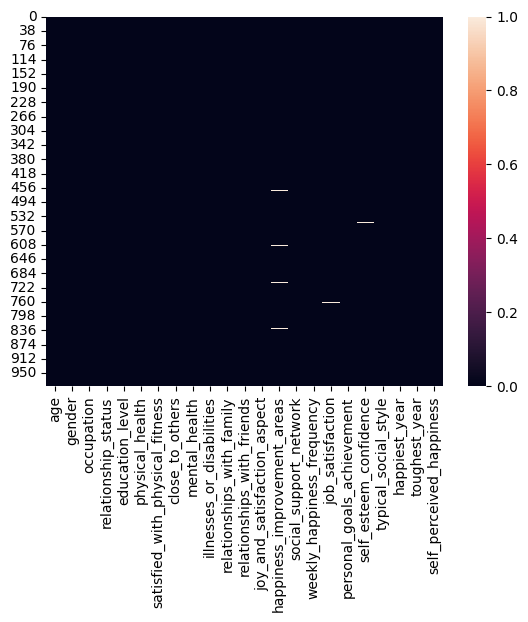

In [43]:
sns.heatmap(df.isnull())

# Calculate mode for each column individually

In [44]:
import math

# Calculate mode for each column individually
#.mode() - most frequently occurring value
#.mode()[0] → Takes the first mode (in case there are multiple)

mode_happiness_improvement = df['happiness_improvement_areas'].mode()[0]
mode_job = df['job_satisfaction'].mode()[0]
mode_self_esteem = df['self_esteem_confidence'].mode()[0]
mode_best_happiness_year = df['happiest_year'].mode()[0]

# Fill NaN values with their respective modes
# .fillna(value) → Replaces all missing (NaN) values with the given value

df['happiness_improvement_areas']=df['happiness_improvement_areas'].fillna(mode_happiness_improvement)
df['job_satisfaction']=df['job_satisfaction'].fillna(mode_job)
df['self_esteem_confidence']=df['self_esteem_confidence'].fillna(mode_self_esteem)
df['happiest_year']=df['happiest_year'].fillna(mode_best_happiness_year)

In [45]:
df.isnull().sum()

,0
age,0
gender,0
occupation,0
relationship_status,0
education_level,0
physical_health,0
satisfied_with_physical_fitness,0
close_to_others,0
mental_health,0
illnesses_or_disabilities,0


In [46]:
# Drop rows with any null values
df.dropna(inplace=True)
print(df.isnull().sum())

age                                0
gender                             0
occupation                         0
relationship_status                0
education_level                    0
physical_health                    0
satisfied_with_physical_fitness    0
close_to_others                    0
mental_health                      0
illnesses_or_disabilities          0
relationships_with_family          0
relationships_with_friends         0
joy_and_satisfaction_aspect        0
happiness_improvement_areas        0
social_support_network             0
weekly_happiness_frequency         0
job_satisfaction                   0
personal_goals_achievement         0
self_esteem_confidence             0
typical_social_style               0
happiest_year                      0
toughest_year                      0
self_perceived_happiness           0
dtype: int64


# heatmap

<Axes: >

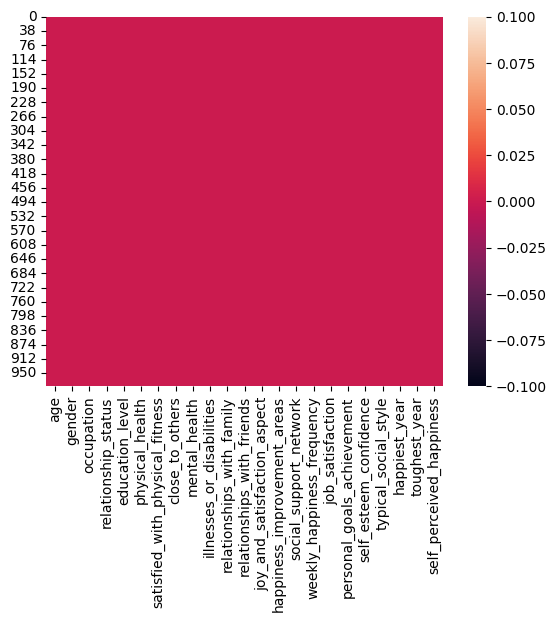

In [47]:
sns.heatmap(df.isnull())

/tmp/ipython-input-750047832.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['mental_health'], palette='coolwarm')


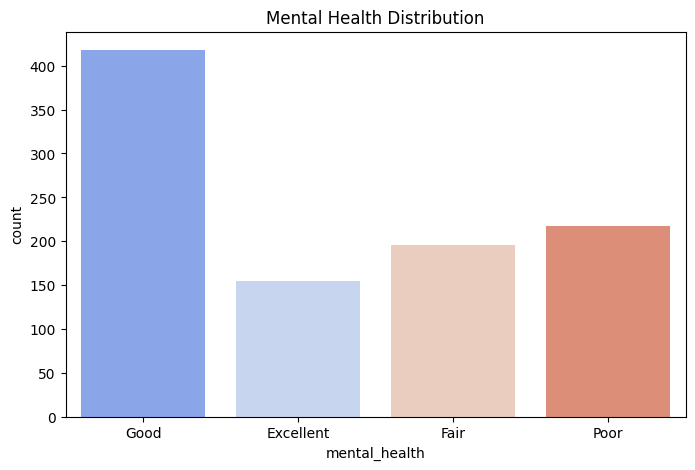

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x=df['mental_health'], palette='coolwarm')
plt.title("Mental Health Distribution")
plt.show()


# summary of numarical colums

In [49]:
import pandas as pd

# Summary of numerical columns
print(df.describe())

# Summary of categorical columns
print(df.describe(include=['object']))

       happiest_year  toughest_year
count     985.000000     985.000000
mean     2019.944162    2021.308629
std         4.540684       1.463713
min      2002.000000    2018.000000
25%      2020.000000    2020.000000
50%      2022.000000    2021.000000
75%      2023.000000    2023.000000
max      2023.000000    2024.000000
          age gender occupation relationship_status    education_level  \
count     985    985        985                 985                985   
unique      3      3          5                   5                  5   
top     18-24   Male    Student              Single  Bachelor's degree   
freq      858    508        919                 596                670   

       physical_health satisfied_with_physical_fitness   close_to_others  \
count              985                             985               985   
unique               5                               5                 5   
top               Good            Moderately Satisfied  Most of the time   
f

# box plot

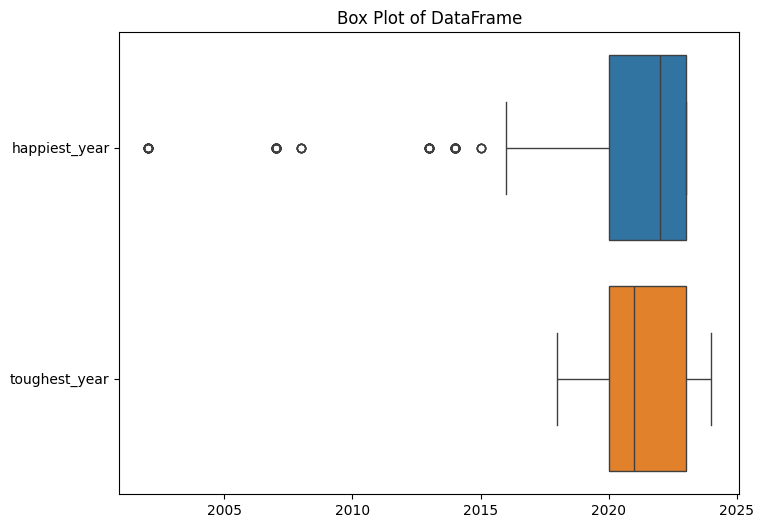

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, orient='h')
plt.title("Box Plot of DataFrame")
plt.show()

# Chart of Mental Health Distribution by Gender in countplot

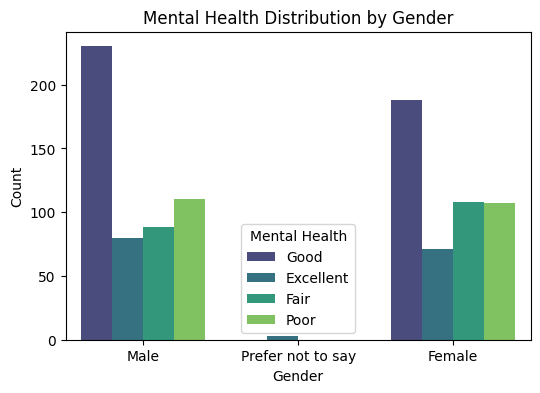

In [51]:
plt.figure(figsize=(6, 4))

# Draws a bar chart
# x='gender' → Shows count based on Gender on X-axis
# hue='mental_health' → Splits each gender bar by Mental Health category (different colors)
# data=df → Uses data from the DataFrame df
# palette='viridis' → Applies the Viridis color theme to the bars
sns.countplot(x='gender', hue='mental_health', data=df, palette='viridis') #palette='viridis' → a smooth mix of green–yellow–blue colors
plt.title("Mental Health Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Mental Health")
plt.show()

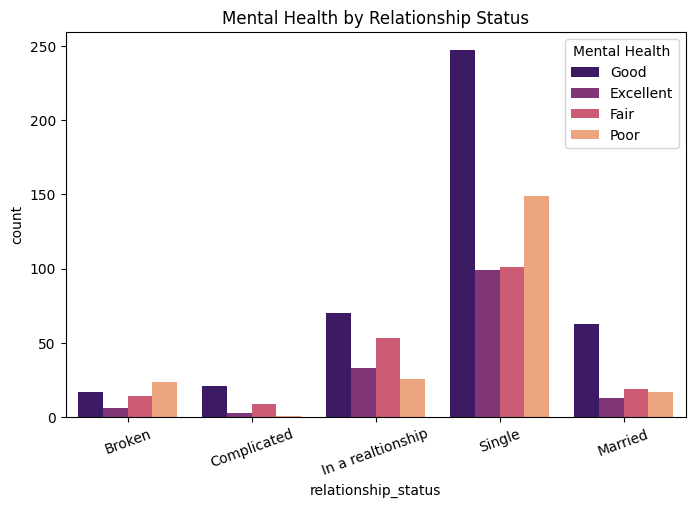

In [52]:

plt.figure(figsize=(8, 5))
sns.countplot(x='relationship_status', hue='mental_health', data=df, palette='magma') #palette='magma' → warm colors like orange–red–purple
plt.title("Mental Health by Relationship Status")
plt.legend(title="Mental Health")
plt.xticks(rotation=20)
plt.show()


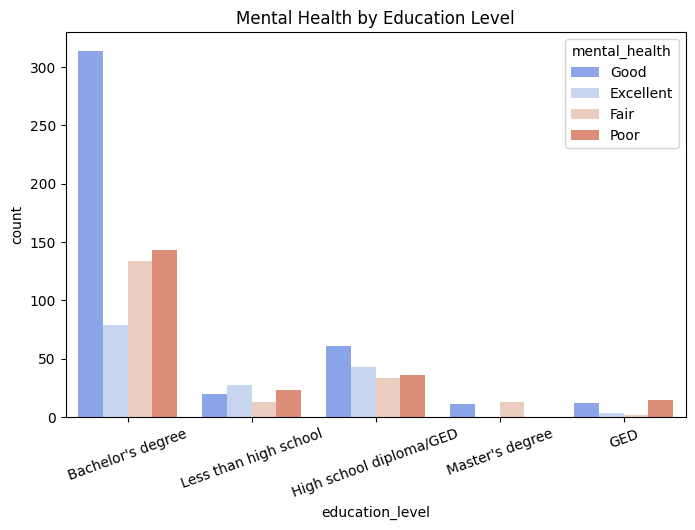

In [53]:
plt.figure(figsize=(8, 5))
sns.countplot(x='education_level', hue='mental_health', data=df, palette='coolwarm') #palette='coolwarm' = blue → red color mix.
plt.title("Mental Health by Education Level")
plt.xticks(rotation=20)
plt.show()

# Boxplot in physical health vs mental health

/tmp/ipython-input-2200920860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mental_health', y='physical_health', data=df, palette='Set2')


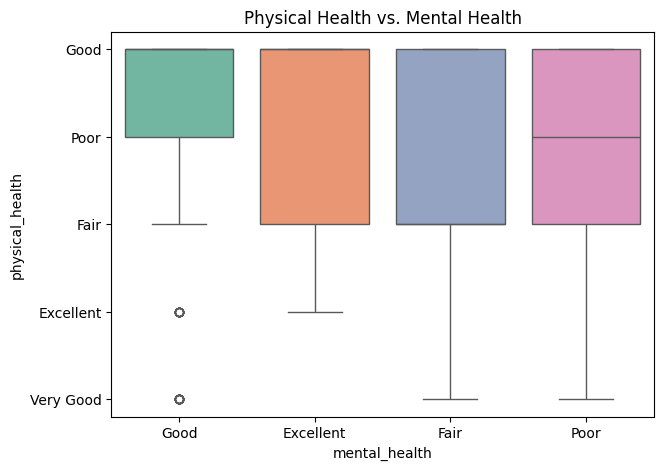

In [54]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='mental_health', y='physical_health', data=df, palette='Set2')
plt.title("Physical Health vs. Mental Health")
plt.show()

# Countplot in Physical Health vs. Mental Health

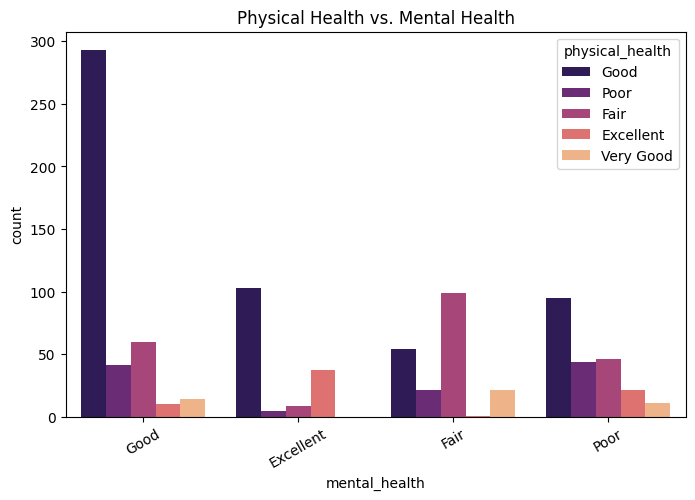

In [55]:
plt.figure(figsize=(8, 5))
sns.countplot(x='mental_health', hue='physical_health', data=df, palette='magma')
plt.title("Physical Health vs. Mental Health")
plt.xticks(rotation=30)
plt.show()

# Histplot

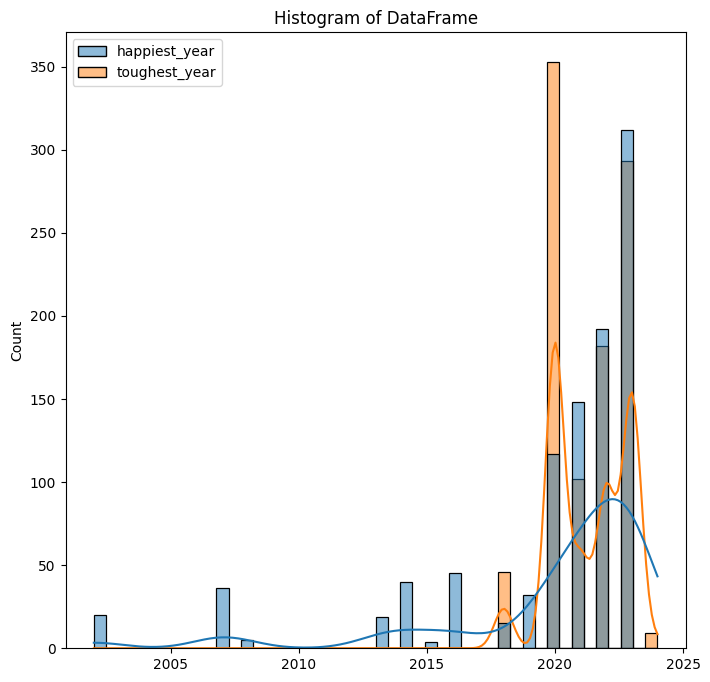

In [56]:
plt.figure(figsize=(8, 8))
sns.histplot(data=df, kde=True) #kde(KDE = Kernel Density Estimate)=True adds a smooth density line on top of the histogram.
plt.title("Histogram of DataFrame")
plt.show()

# Encoding Data

In [57]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Initialize a dictionary to store encoders                                     #Encoder = convert to numbers, Decoder = convert back to original
label_encoders = {}

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for future use

# Verify encoding
print(df.head())


   age  gender  occupation  relationship_status  education_level  \
0    0       1           3                    0                0   
1    1       2           3                    1                3   
2    0       0           3                    0                0   
3    0       1           3                    2                2   
4    0       1           3                    4                0   

   physical_health  satisfied_with_physical_fitness  close_to_others  \
0                2                                4                3   
1                3                                4                2   
2                1                                3                2   
3                2                                1                2   
4                1                                3                2   

   mental_health  illnesses_or_disabilities  ...  happiness_improvement_areas  \
0              2                          1  ...                            6

In [58]:
df

,age,gender,occupation,relationship_status,education_level,physical_health,satisfied_with_physical_fitness,close_to_others,mental_health,illnesses_or_disabilities,...,happiness_improvement_areas,social_support_network,weekly_happiness_frequency,job_satisfaction,personal_goals_achievement,self_esteem_confidence,typical_social_style,happiest_year,toughest_year,self_perceived_happiness
0,0,1,3,0,0,2,4,3,2,1,...,6,2,3,2,0,0,2,2019.0,2023,0
1,1,2,3,1,3,3,4,2,0,2,...,3,4,3,3,1,0,1,2023.0,2021,3
2,0,0,3,0,0,1,3,2,1,0,...,5,2,3,3,0,2,1,2016.0,2023,0
3,0,1,3,2,2,2,1,2,0,1,...,8,3,4,3,0,0,1,2020.0,2021,3
4,0,1,3,4,0,1,3,2,1,0,...,8,2,3,1,0,0,1,2021.0,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0,0,3,4,0,3,3,3,3,1,...,6,2,3,2,0,2,1,2022.0,2023,1
981,0,1,3,4,0,2,3,3,1,2,...,3,0,3,4,1,0,3,2020.0,2021,2
982,0,0,3,4,2,1,1,3,1,0,...,6,0,2,2,0,2,2,2021.0,2020,0
983,0,0,3,4,0,2,2,2,0,1,...,8,3,2,4,1,2,1,2023.0,2020,3


In [59]:
df.describe()

,age,gender,occupation,relationship_status,education_level,physical_health,satisfied_with_physical_fitness,close_to_others,mental_health,illnesses_or_disabilities,...,happiness_improvement_areas,social_support_network,weekly_happiness_frequency,job_satisfaction,personal_goals_achievement,self_esteem_confidence,typical_social_style,happiest_year,toughest_year,self_perceived_happiness
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,...,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,0.178680,0.521827,2.924873,3.165482,0.740102,1.848731,2.105584,2.101523,1.708629,0.889340,...,4.781726,1.396954,2.149239,2.320812,0.264975,1.280203,1.811168,2019.944162,2021.308629,1.143147
std,0.496484,0.505841,0.498413,1.208047,1.162361,0.880261,1.167401,1.229651,0.980178,0.663308,...,2.287308,1.363651,1.336275,1.068119,0.441544,0.926498,0.894244,4.540684,1.463713,1.299162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2002.000000,2018.000000,0.000000
25%,0.000000,0.000000,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,2020.000000,2020.000000,0.000000
50%,0.000000,1.000000,3.000000,4.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,5.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2022.000000,2021.000000,0.000000
75%,0.000000,1.000000,3.000000,4.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,...,6.000000,2.000000,3.000000,3.000000,1.000000,2.000000,3.000000,2023.000000,2023.000000,3.000000
max,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,...,8.000000,4.000000,4.000000,4.000000,1.000000,2.000000,3.000000,2023.000000,2024.000000,3.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              985 non-null    int64  
 1   gender                           985 non-null    int64  
 2   occupation                       985 non-null    int64  
 3   relationship_status              985 non-null    int64  
 4   education_level                  985 non-null    int64  
 5   physical_health                  985 non-null    int64  
 6   satisfied_with_physical_fitness  985 non-null    int64  
 7   close_to_others                  985 non-null    int64  
 8   mental_health                    985 non-null    int64  
 9   illnesses_or_disabilities        985 non-null    int64  
 10  relationships_with_family        985 non-null    int64  
 11  relationships_with_friends       985 non-null    int64  
 12  joy_and_satisfaction_a

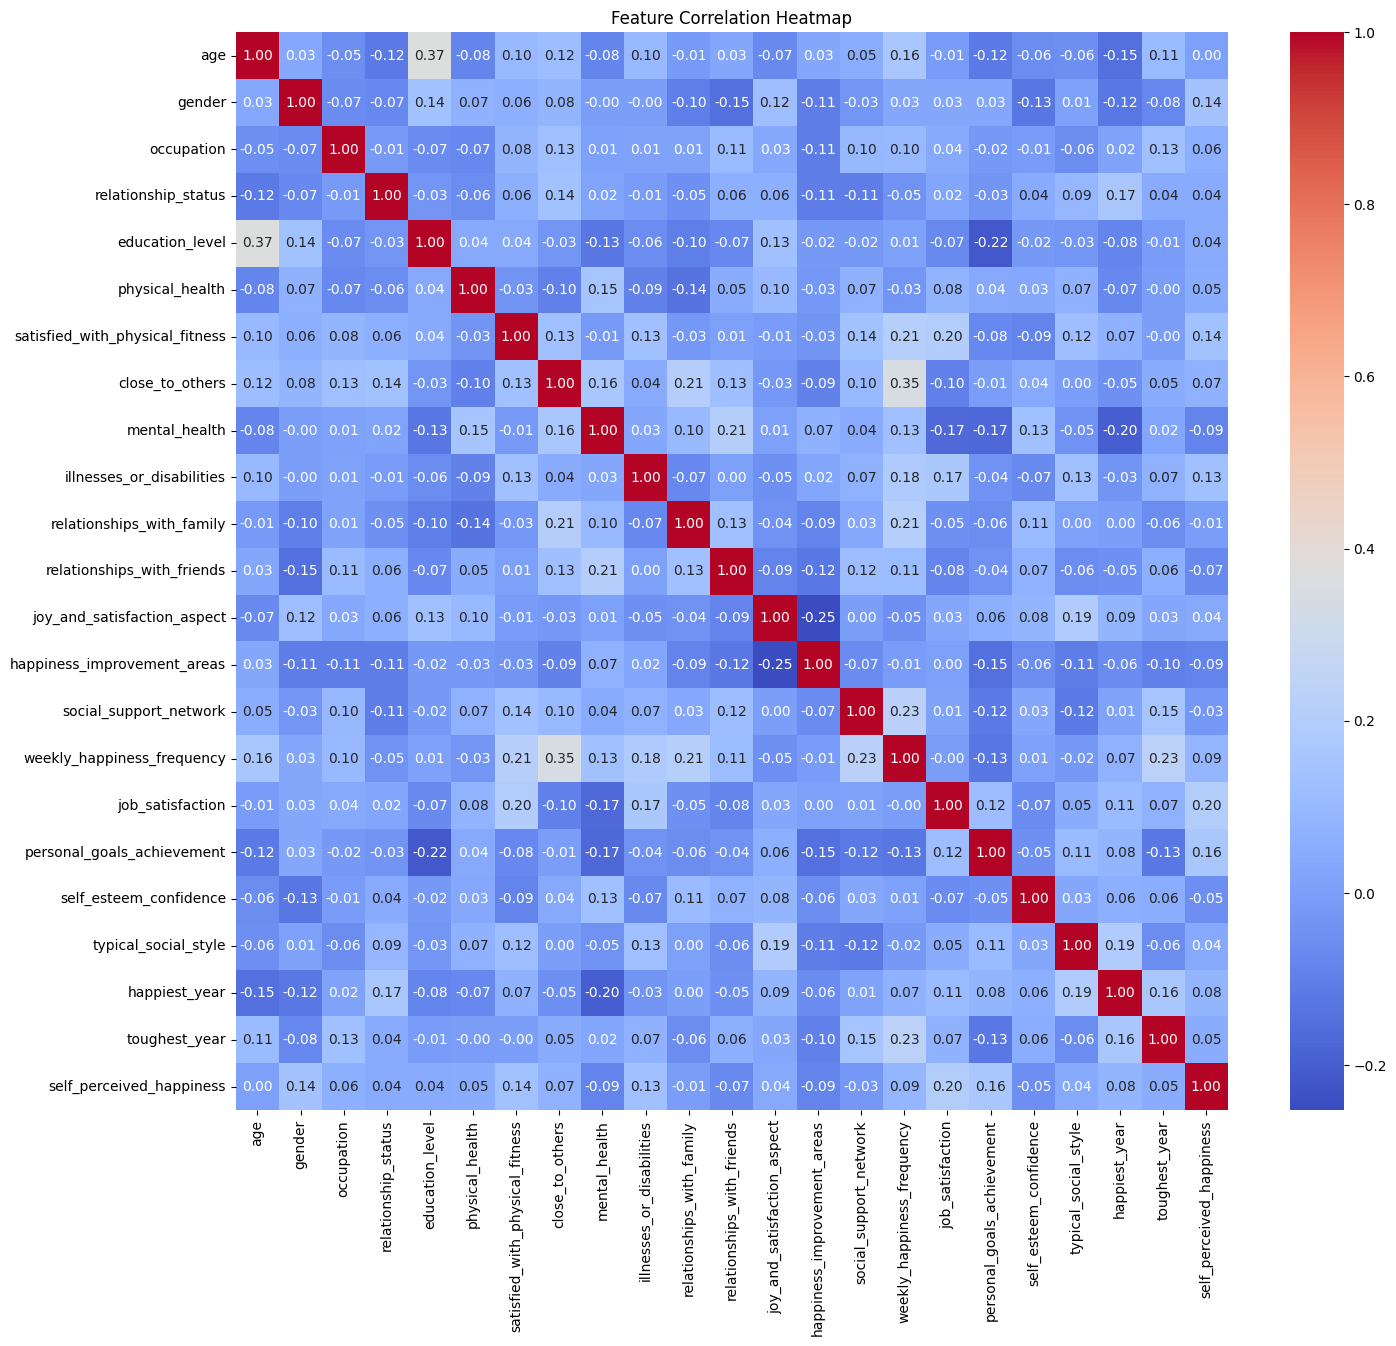

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


# Random Forest Feature Importance
# Predicting 'mental_health' & Visualizing Key Features

/tmp/ipython-input-1490481194.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')


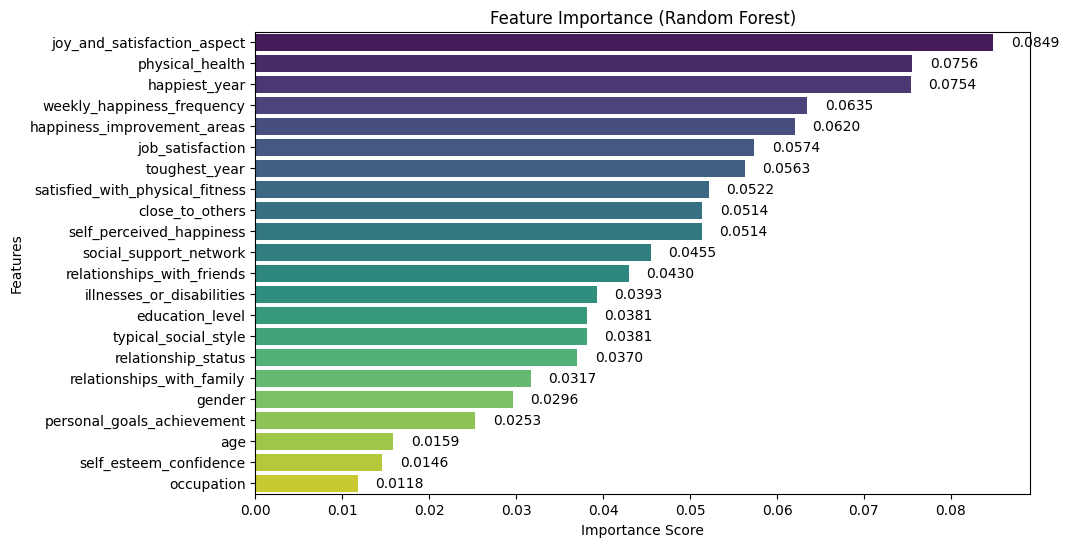

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = df.drop(columns=['mental_health'])
y = df['mental_health']

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot with values
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')

# Annotate values
for i, v in enumerate(feature_importance):
    ax.text(v + 0.002, i, f"{v:.4f}", color='black', va="center")

plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# Random Forest Feature Importance Analysis
# Predicting 'mental_health' & Visualizing Key Features (%)

/tmp/ipython-input-2191898921.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')


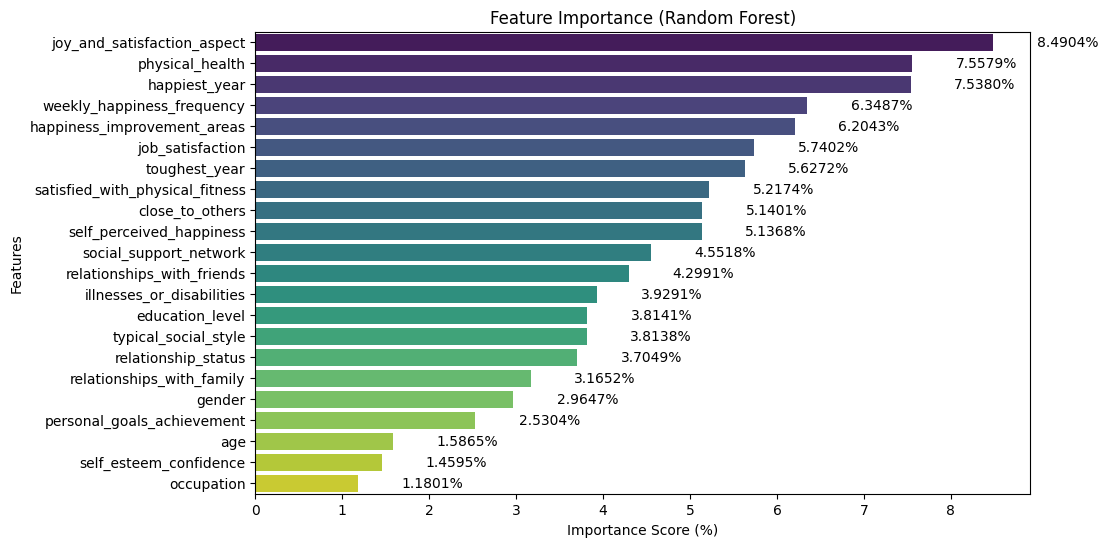

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = df.drop(columns=['mental_health'])
y = df['mental_health']

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance (convert to percentage)
feature_importance = pd.Series(model.feature_importances_ * 100, index=X.columns).sort_values(ascending=False)

# Plot with values
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')

# Annotate values as percentages
for i, v in enumerate(feature_importance):
    ax.text(v + 0.5, i, f"{v:.4f}%", color='black', va="center")

plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score (%)")
plt.ylabel("Features")
plt.show()


In [64]:
# Drop specified columns
df = df.drop(columns=['personal_goals_achievement', 'self_esteem_confidence', 'occupation'])


# Plot the distribution of 'mental_health' with 4 classes

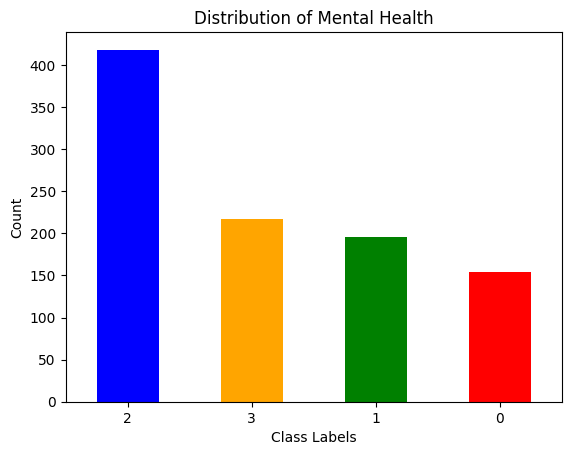

In [73]:
import matplotlib.pyplot as plt

# Plot the distribution of 'mental_health' with 4 classes
df['mental_health'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Distribution of Mental Health")

# Set custom x-ticks if needed (for 4 classes)
plt.xticks(ticks=range(4), labels=df['mental_health'].value_counts().index, rotation=0)

plt.show()

# Value Counts

In [66]:
print(df['mental_health'].value_counts())

mental_health
2    418
3    217
1    196
0    154
Name: count, dtype: int64


# SMOTE
# S – Synthetic
# M – Minority
# O – Over
# T – Sampling
# E – Technique

In [67]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['mental_health'])
y = df['mental_health']

smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)

# Convert back to DataFrame
df_balanced = pd.DataFrame(X_balanced, columns=X.columns)
df_balanced['mental_health'] = y_balanced

print("Class distribution after SMOTE:")
print(df_balanced['mental_health'].value_counts())

Class distribution after SMOTE:
mental_health
2    418
0    418
1    418
3    418
Name: count, dtype: int64


/tmp/ipython-input-3220643320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_balanced['mental_health'], palette='coolwarm')


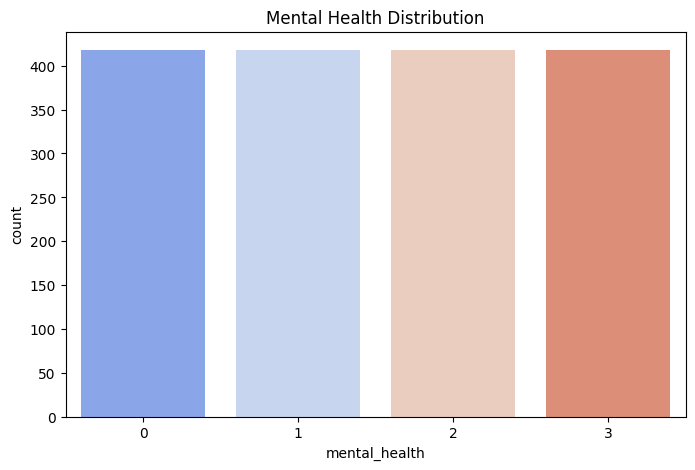

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x=df_balanced['mental_health'], palette='coolwarm')
plt.title("Mental Health Distribution")
plt.show()


# Train & Test data

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

Training Set Size: (1337, 19)
Testing Set Size: (335, 19)


In [78]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.0 MB/s eta 0:00:00


# NAIVE_BAYES MODEL

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5850746268656717


# Confusion Matrix for Naive Bayes Classifier

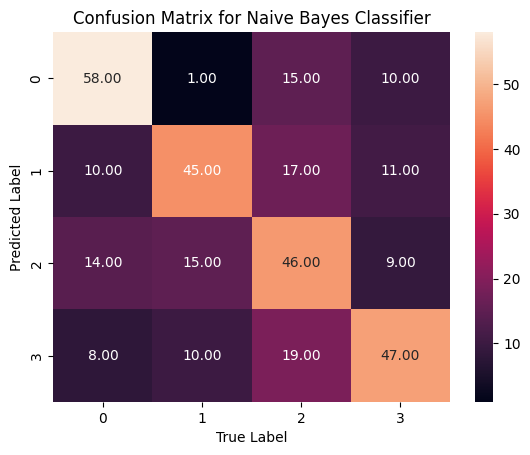

In [82]:

from sklearn.metrics import confusion_matrix
cm = np.array(pd.crosstab(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()


In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.69      0.67        84
           1       0.63      0.54      0.58        83
           2       0.47      0.55      0.51        84
           3       0.61      0.56      0.58        84

    accuracy                           0.59       335
   macro avg       0.59      0.58      0.59       335
weighted avg       0.59      0.59      0.59       335



# Decision Tree

In [85]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8865671641791045
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        84
           1       0.89      0.89      0.89        83
           2       0.83      0.88      0.86        84
           3       0.90      0.85      0.87        84

    accuracy                           0.89       335
   macro avg       0.89      0.89      0.89       335
weighted avg       0.89      0.89      0.89       335



# Confusion Matrix for Decision Tree Classifier

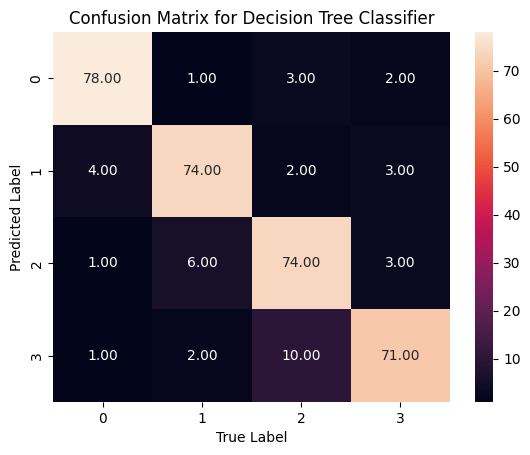

In [86]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# KNN

In [90]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9343283582089552


# Confusion Matrix for KNN Classifier

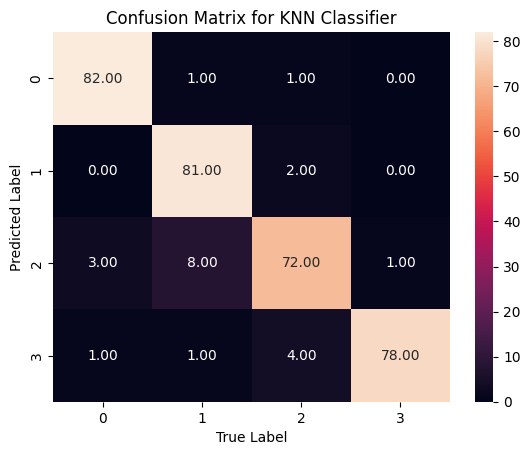

In [92]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for KNN Classifier")
plt.show()

# Logistic Regression

In [93]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)


Accuracy: 0.5194029850746269


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        84
           1       0.51      0.59      0.54        83
           2       0.33      0.17      0.22        84
           3       0.52      0.60      0.55        84

    accuracy                           0.52       335
   macro avg       0.49      0.52      0.50       335
weighted avg       0.49      0.52      0.50       335



# Confusion Matrix for Logistic Regression Classifier

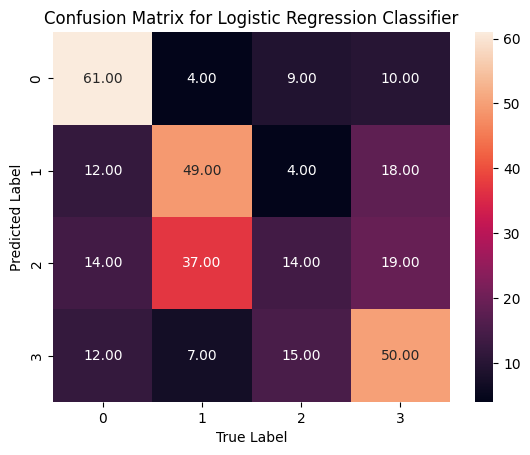

In [95]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.show()

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R^2:", r2)

MAE: 0.8008457608685818
MSE: 0.896123900062978
R^2: 0.28480752770262474


In [97]:
!pip install streamlit pyngrok scikit-learn joblib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 41.5 MB/s eta 0:00:00
